Complejidad espacial es cuantos datos se utlizan para resolkver el problema en cuestion -memoria
Temporal es lo invertido en procesamiento


In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')

1. Programe la regla 110 sobre un autómata celular unidimensional de longitud L y una evolución de
T unidades de tiempo. 

In [2]:
def no_al(lon):
    arreglo = random.choices([0,1], k=lon)
    return arreglo
def actualizar_estado(automata,regla): #,n
    p = [0]*8
    fr = []
    l = len(automata)
    nestado = [0]*len(automata) #nestado *L 
    for k in range(0,l): # 1 a n-1
        izq = k-1
        der = k+1
        if k ==0:
            izq = -1
        if k ==l-1:
            der = 0
        if automata[izq] ==0 and automata[k] == 0 and automata[der] == 0:
            nestado[k] = regla[0]
            p[0] = p[0]+1
        if automata[izq] ==0 and automata[k] == 0 and automata[der] == 1:
            nestado[k] = regla[1]
            p[1] = p[1]+1

        if automata[izq] ==0 and automata[k] == 1 and automata[der] == 0:
            nestado[k] = regla[2]
            p[2] = p[2]+1

        if automata[izq] ==0 and automata[k] == 1 and automata[der] == 1:
            nestado[k] = regla[3]
            p[3] = p[3]+1

        if automata[izq] ==1 and automata[k] == 0 and automata[der] == 0:
            nestado[k] = regla[4]
            p[4] = p[4]+1

        if automata[izq] ==1 and automata[k] == 0 and automata[der] == 1:
            nestado[k] = regla[5]
            p[5] = p[5]+1

        if automata[izq] ==1 and automata[k] == 1 and automata[der] == 0:
            nestado[k] = regla[6]
            p[6] = p[6]+1

        if automata[izq] ==1 and automata[k] == 1 and automata[der] == 1:
            nestado[k] = regla[7] 
            p[7] = p[7]+1
    automata = nestado
    p = list(np.array(p)/l) 
    return p,automata

def evolucion(automata,regla,n):
    global p
    frec = [0]*n
    paso_t = [0]*n
    for k in range(n):
        paso_t[k] = automata
        p,automata = actualizar_estado(automata,regla) #,n
        frec[k] = p
    return paso_t,frec

def nueva_regla(num):
    if num > 0 and num <256:
        bin = format(int(num),'08b')
        bin = [int(i) for i in list(bin)]
        return list(reversed(bin))
    else:
        print(' El número colocado no esta en los 8 bits. Por tanto, el proceso se realizará con la regla 110')
        bin = [0,1,1,0,1,1,1,0]
        return list(reversed(bin))
#Variables que denotan la longitud del estado inicial y el tiempo en que cambiara
n = 100
L = 100
# regla = [0,1,1,1,0,1,1,0]
# #V adel menos 01 al mas por tanto ba inbertido
# regla = [0,1,1,0,1,1,1,0]
automata = no_al(L)
regla = nueva_regla(110)
#por tanto se pone de la forma anterior
#Luego queremos generar digitos aleatorios
resul,_ = evolucion(automata,regla,n)

. Evolucione el autómata celular para diferentes valores de 𝐿 = 10, 100, 1000, $10^4,10^5,10^6,...$
celdas y 𝑇 = 10, 100, 1000,  $10^4,10^5,10^6,...$ pasos discretos.

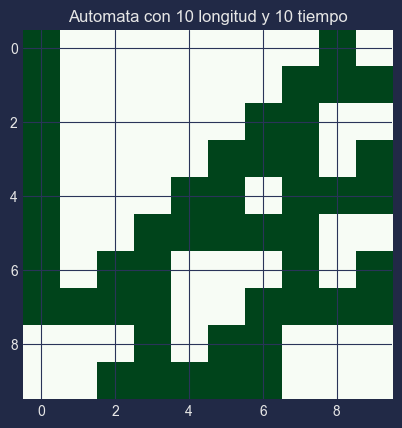

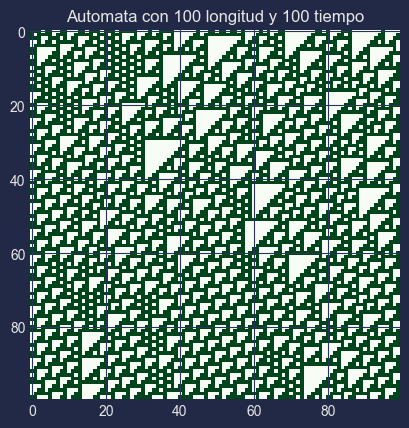

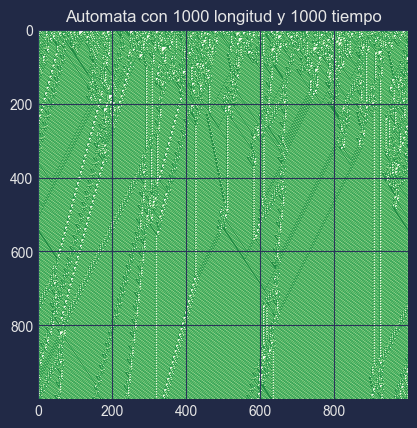

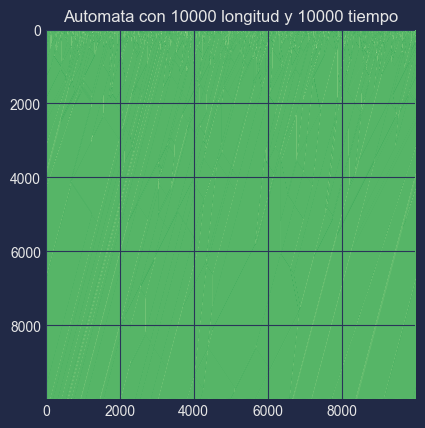

In [3]:
Ls = [10**i for i in range(1,5)]
Ts = [10**i for i in range(1,5)]
regla = nueva_regla(110)
for i in Ls:
    automata = no_al(i)
    resul,_ = evolucion(automata,regla,i)
    plt.figure()
    plt.imshow(resul,cmap='Greens')#binary
    plt.title(f'Automata con {i} longitud y {i} tiempo')
    plt.legend(['a','b'])
    plt.show()



3. Identifique patrones espacio-temporales en los estados que de celdas. Estos patrones
corresponden a un autómata de etiquetas cíclico, mediante el cual se pueden codificar los datos,
estados y reglas de producción de una Máquina de Turing.

Los patrones que se observan hace una forma de flecha hacia la parte superior izquierda.

4. Adapte su programa para que utilice diferentes reglas codificadas en números de 8 bits y pruebe su implementación para 10 reglas distintas (entre 0 a
255).

Para las diferentes relgas se usaron las más caracteristicas por tener patrones conocidos. Por lo que se usarán

1)30

2)90

3)45

4)54

5)60

6)250

7)137

8)150

9)182

10)225


In [4]:
reglas = [110,30,90,45,54,60,250,137,150,182,225]

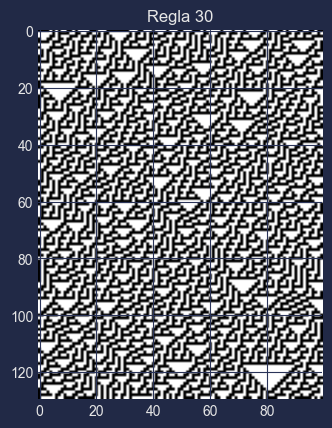

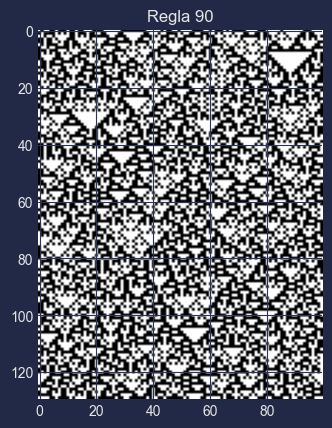

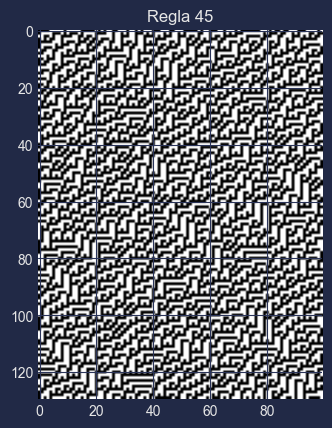

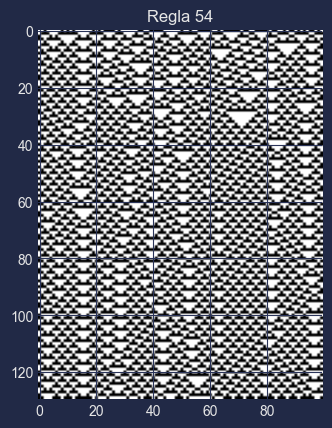

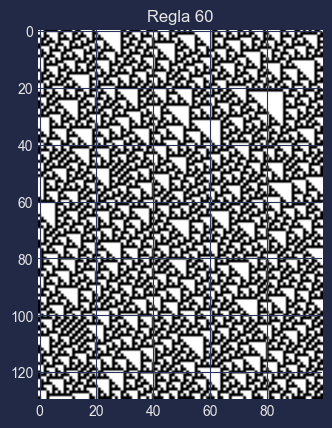

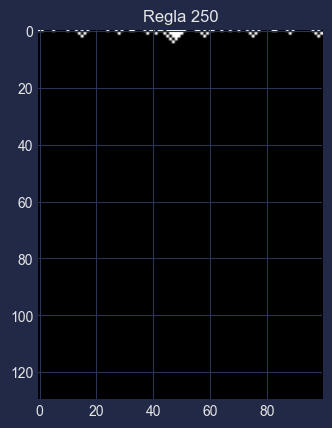

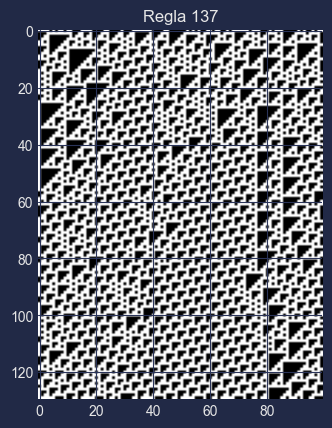

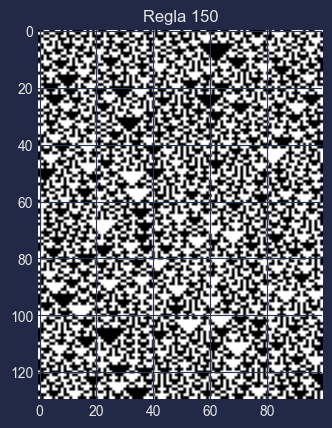

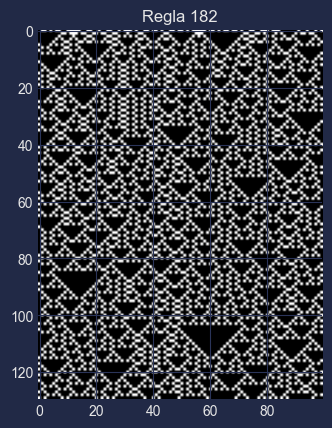

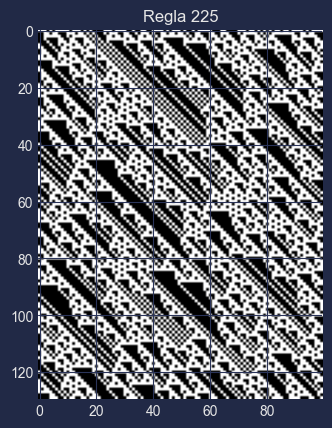

In [5]:
lon = 100
t = 130
i = 0
frecuencia = [0]*11
for r in reglas:
    automata = no_al(lon)
    regla = nueva_regla(r)
    resul,a = evolucion(automata,regla,t)
    frecuencia[i] =a
    if i !=0:
        plt.figure()
        plt.imshow(resul,cmap='binary')
        plt.title(f'Regla {r}')
        plt.show()
    i+=1

5. Calcule la complejidad espacial y temporal de su implementación.


La complejidad espacial vendría siendo el objeto que más memoria ocupa que es resul cuya memoria ocupa longitud * número de pasos.

Para calcular la complejidad temporal observemos que nuestro codigo cuenta con dos funciones tardadas : "actualizar estado", 'evolucionar'. La función 'evolucionar' tiene un for que llema a la función 'actualizar estado' que a su vez tiene otro for. Es decir es equivalente a un for anidaddo de la siguiente estructura.

for i in range(n):
    for j in range(t):
        f()

Es decir, espero que se repita n veces el cilo que se repite t veces. Por lo que, la función f() se repetiría n*t. Por tanto, si $n = t$ su complejidad sería $O(n^2)$ y si son diferentes $O(n t)$

6. Evolucione el autómata para cada una de las nuevas reglas que ha propuesto. En cada paso, para
cada línea de celdas de su autómata, calcule las probabilidades de encontrar los patrones de bits
000, 001, 010, 011, 100, 101, 110 y 111. Con estas
probabilidades, calcule la cantidad de información (entropía) de la configuración del autómata
celular en el paso en el que se encuentra:

$-\sum p_klog_2(p_k)$

c:\Users\alanu\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\internals\blocks.py:352: RuntimeWarning: divide by zero encountered in log2
  result = func(self.values, **kwargs)


<Figure size 640x480 with 0 Axes>

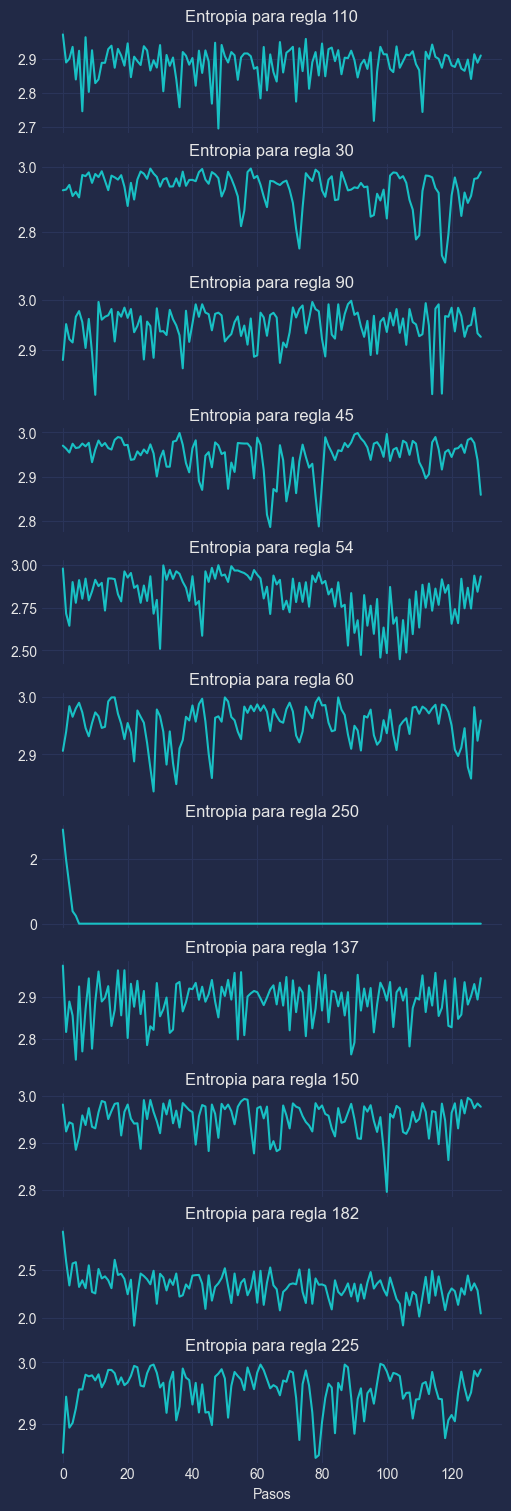

In [6]:
size = np.shape(frecuencia)
#obtener la entropia
plt.figure()
fig,axs = plt.subplots(size[0],1,sharex=True,layout = 'constrained',figsize = (5,15))
for i,ax in enumerate(axs.flat):
    aux = pd.DataFrame(frecuencia[i])
    a = -aux*np.log2(aux)
    entropia = a.sum(axis = 1)    
    ax.plot(entropia)
    ax.set_title(f'Entropia para regla {reglas[i]}')
    if i == size[0]-1:
        ax.set_xlabel('Pasos')

7. Para cada una de las reglas propuestas, grafique como cambia la entropía conforme evoluciona
su autómata para diferentes valores de 𝐿 = 10, 100, 1000, 10
4
, 10
5
, 106
, … celdas y 𝑇 =
10, 100, 1000, 10
4
, 10
5
, 106
, … pasos discretos

In [7]:
lon = [10,100,1000,5000]
no_t = len(lon)
frec_vr = [[0] * len(reglas) for _ in range(no_t)]#[[0]*len(reglas)]*no_t
aux = 0
for j,r in enumerate(reglas):
    reg = nueva_regla(r)
    for i,l in enumerate(lon): #il lon
        aux +=1
        automata = no_al(l)
        resul,a = evolucion(automata,reg,l)

        frec_vr[i][j] =a

c:\Users\alanu\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:2009: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape
C:\Users\alanu\AppData\Local\Temp\ipykernel_22492\1175811798.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


<Figure size 640x480 with 0 Axes>

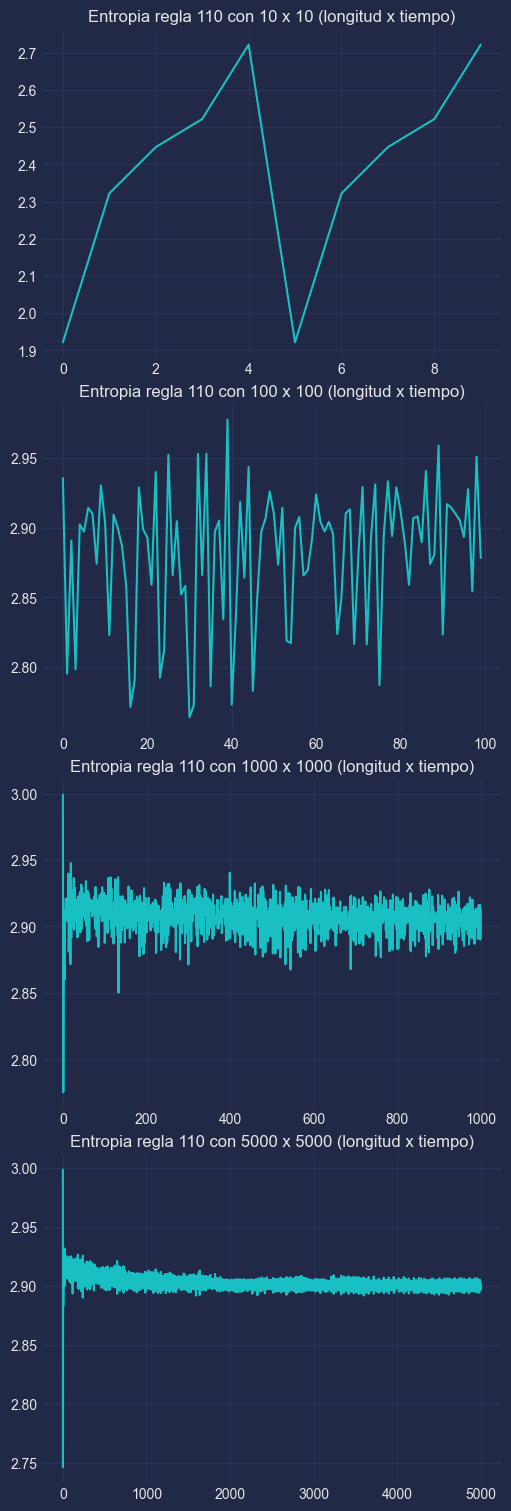

<Figure size 640x480 with 0 Axes>

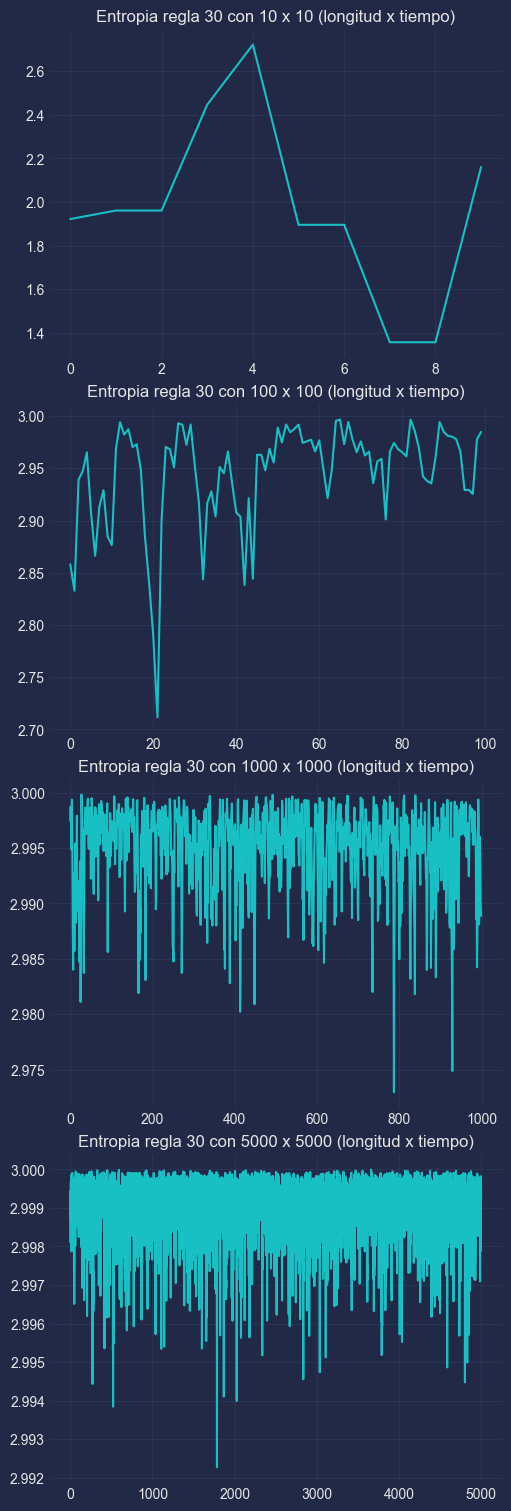

<Figure size 640x480 with 0 Axes>

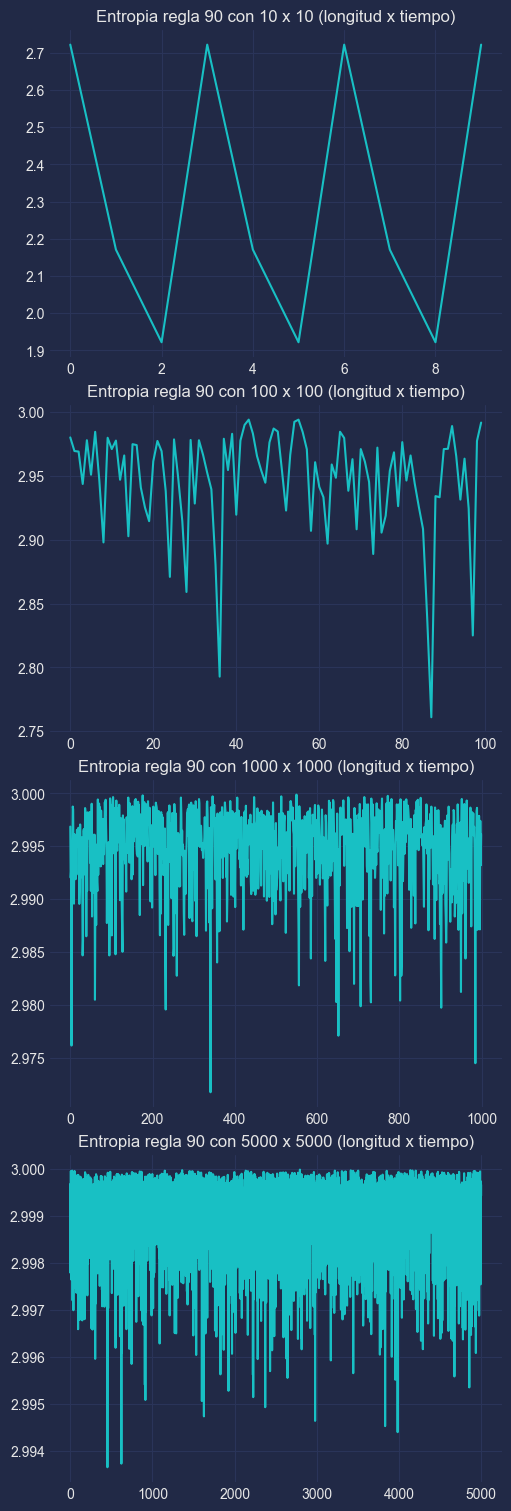

<Figure size 640x480 with 0 Axes>

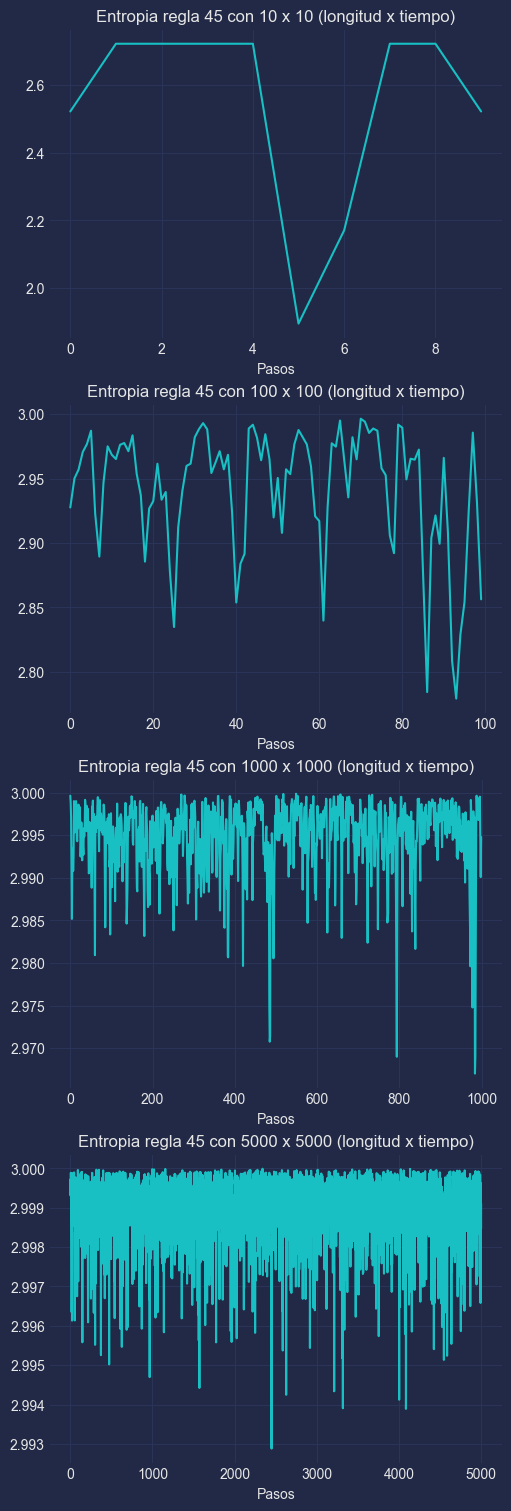

<Figure size 640x480 with 0 Axes>

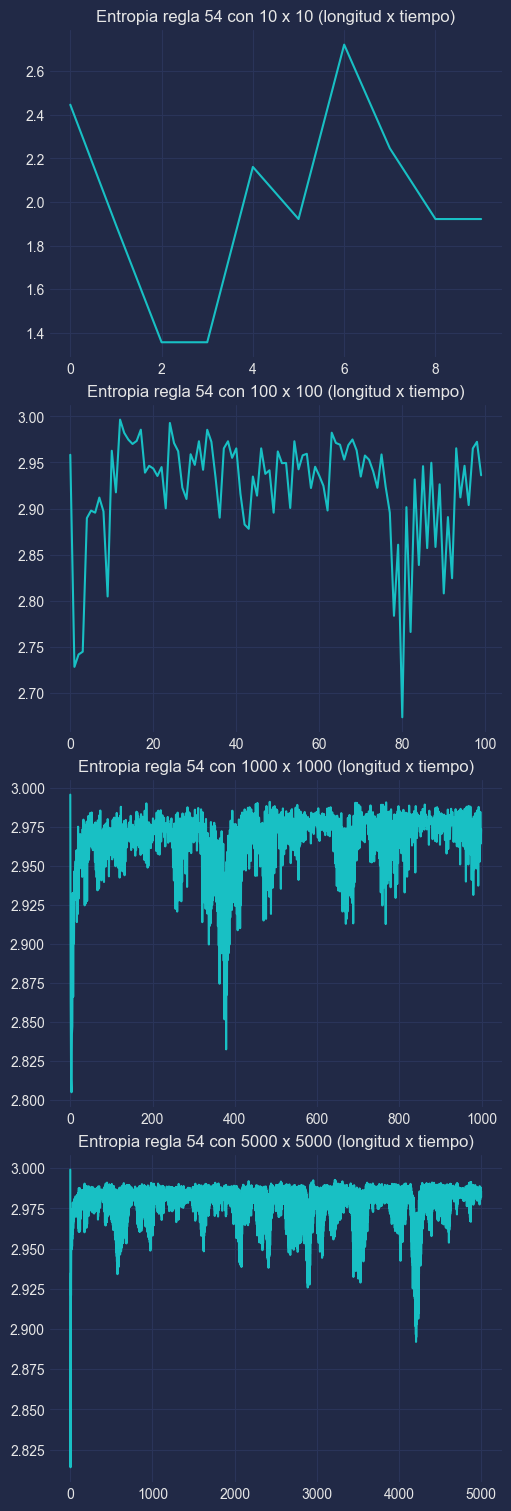

<Figure size 640x480 with 0 Axes>

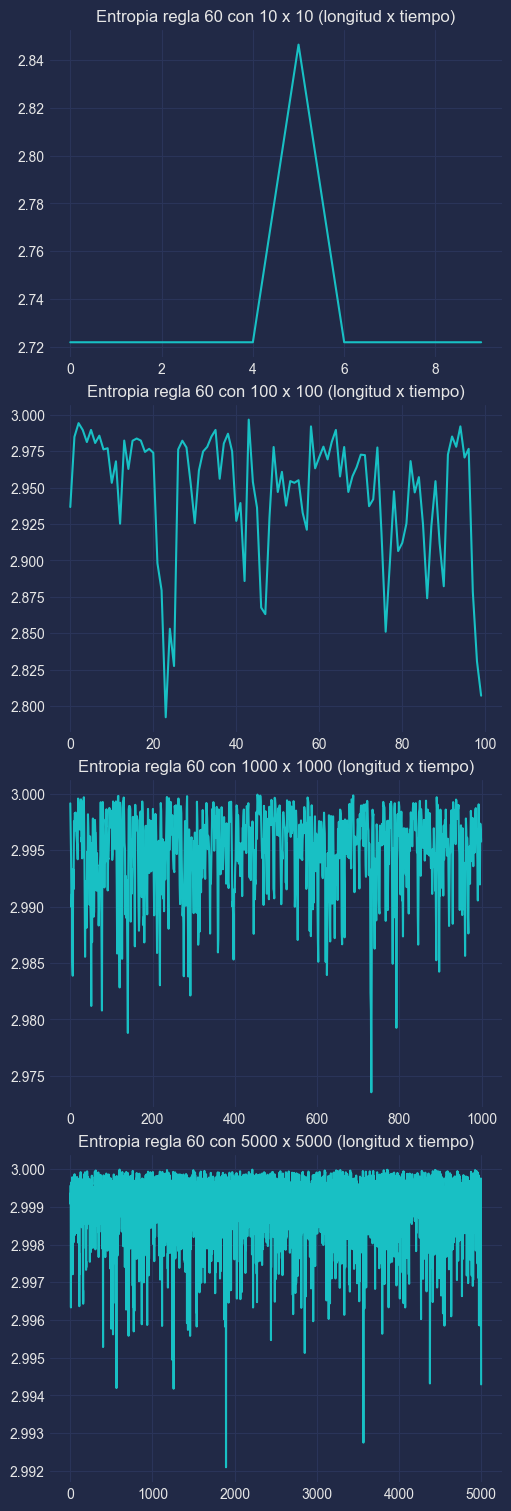

<Figure size 640x480 with 0 Axes>

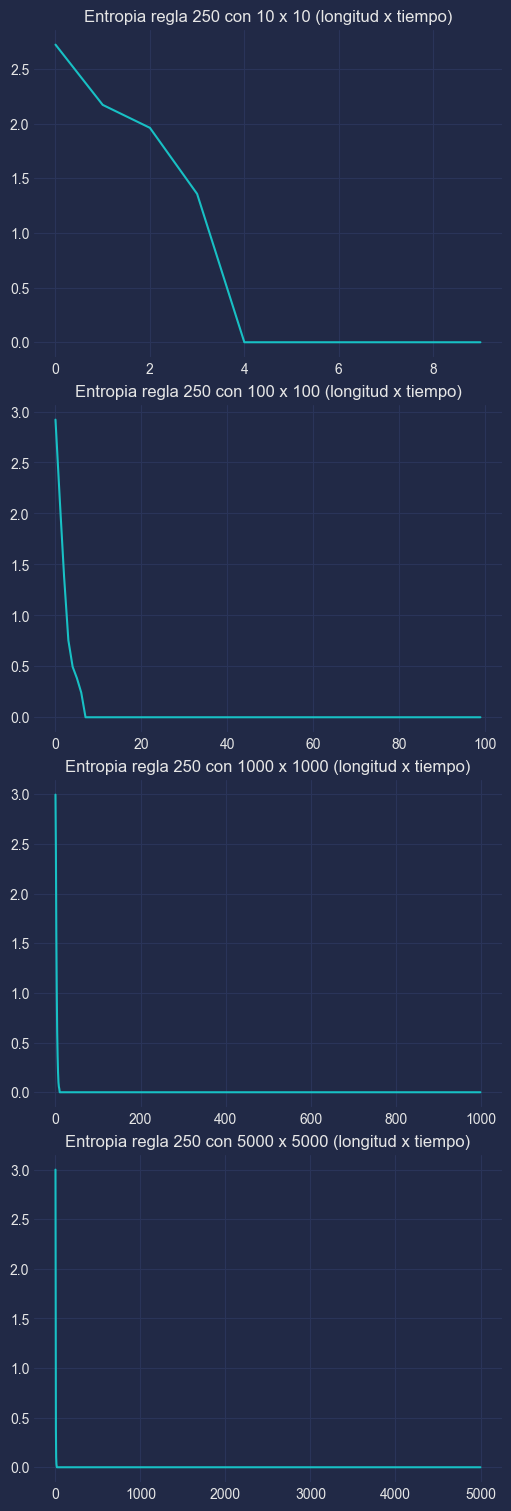

<Figure size 640x480 with 0 Axes>

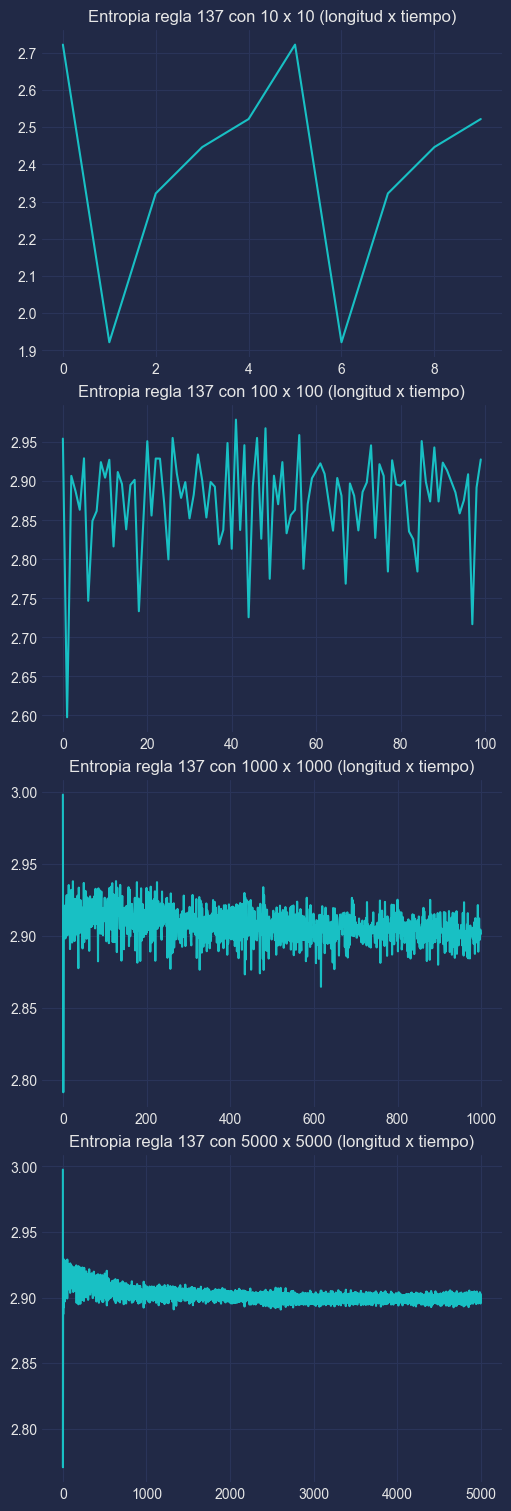

<Figure size 640x480 with 0 Axes>

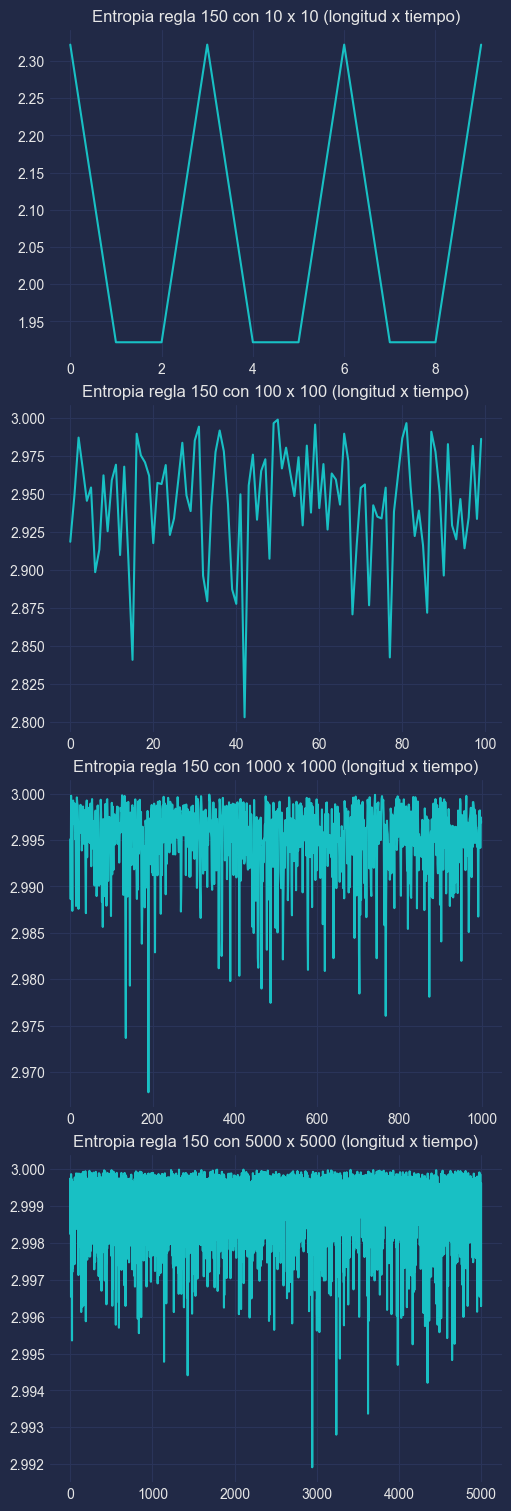

<Figure size 640x480 with 0 Axes>

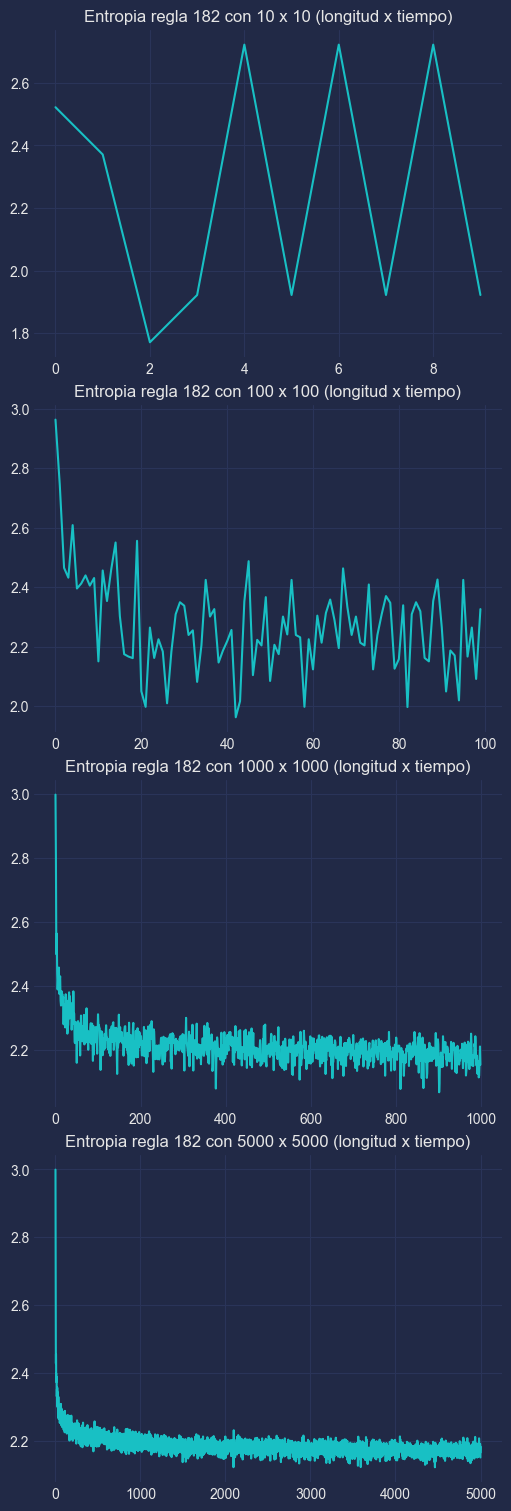

<Figure size 640x480 with 0 Axes>

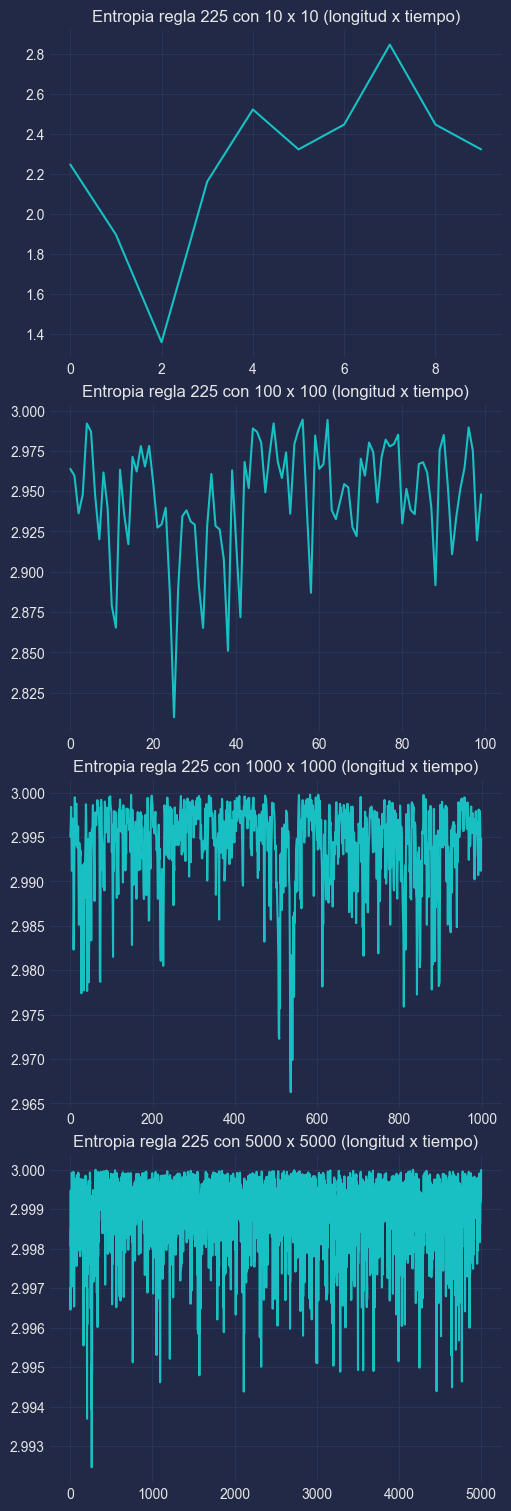

In [8]:
size = np.shape(frec_vr)
#obtener la entropia
for i in range(11):
    plt.figure()
    fig,axs = plt.subplots(4,1,layout = 'constrained',figsize = (5,15))
    for j,ax in enumerate(axs.flat):
        aux = pd.DataFrame(frec_vr[j][i])
        a = -aux*np.log2(aux)
        entropia = a.sum(axis = 1)
        ax.plot(entropia)
        ax.set_title(f'Entropia regla {reglas[i]} con {lon[j]} x {lon[j]} (longitud x tiempo)')
        if i == size[0]-1:
            ax.set_xlabel('Pasos')